Historical data for many stocks indicate long-term exponential growth or decline. Prices cannot be negative and geometric Brownian motion takes only positive values. Let $Y_t$ denote the price of a stock after t days. Since the price on a given day is probably close to the price on the next day (assuming normal market conditions), stock
prices are not independent. However, the percent changes in price from day to day $Y_{t} / Y_{t-1},$ for $t=1,2,\ldots$ might be reasonably modeled as independent and identically distributed. This leads to geometric Brownian motion. In the context of stock prices, the standard deviation $\sigma$ is called the volatility.

Assume that $\mathrm{XYZ}$ stock currently sells for $\$ 80$ a share and follows a geometric Brownian motion with drift parameter 0.10 and volatility $0.50 .$ Find the probability that in 90 days the price of $\mathrm{XYZ}$ will rise to at least $\$ 100 .$

**From Annualized Volatility we can get daily volatility as:**
$$\sigma_P=\sigma_{daily}\times\sqrt{P}$$
**Where P is the total number of trading days of a year. We set it to be 365 here.**

**From Annualized Drift we can get daily drift as:**
$$\mu_{P}=\mu_{daily}\times P$$

In [43]:
from scipy.stats import norm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def stockEvolve(days, p0, drift, volatility):
    rv = norm()
    xs = rv.rvs(size=days-1).tolist()
    xs = [0]+xs
    bs = np.cumsum(xs)
    f = bs*volatility/np.sqrt(365)+drift*np.linspace(0,days/365,days)
    Gs = p0*np.exp(f)
    return Gs

Drift = 0.1
Volatility = 0.5
P0 = 80
T = 90

Text(0, 0.5, 'Price')

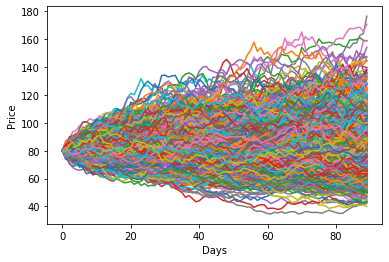

In [44]:
rep = 1000
over100 = 0

for i in range(rep):
    g = stockEvolve(T,P0,Drift,Volatility)
    plt.plot(g)
    if g[-1]>=100:
        over100+=1
plt.xlabel('Days')
plt.ylabel('Price')

In [45]:
print('the probability that 90-day price will be at least 100 is {}'.format(over100/rep))

the probability that 90-day price will be at least 100 is 0.212


**Analytical probability is 0.214, math detail is in the notes**